In [1]:
from pyuba.uba import PyUba

uba = PyUba()

x_data = [1, 3, 7, 14, 30, 60, 90, 180]
y_data = [80, 70, 55, 50, 30, 22, 10, 8]
facebook = uba.create_profile(days=x_data, retention_values=y_data)

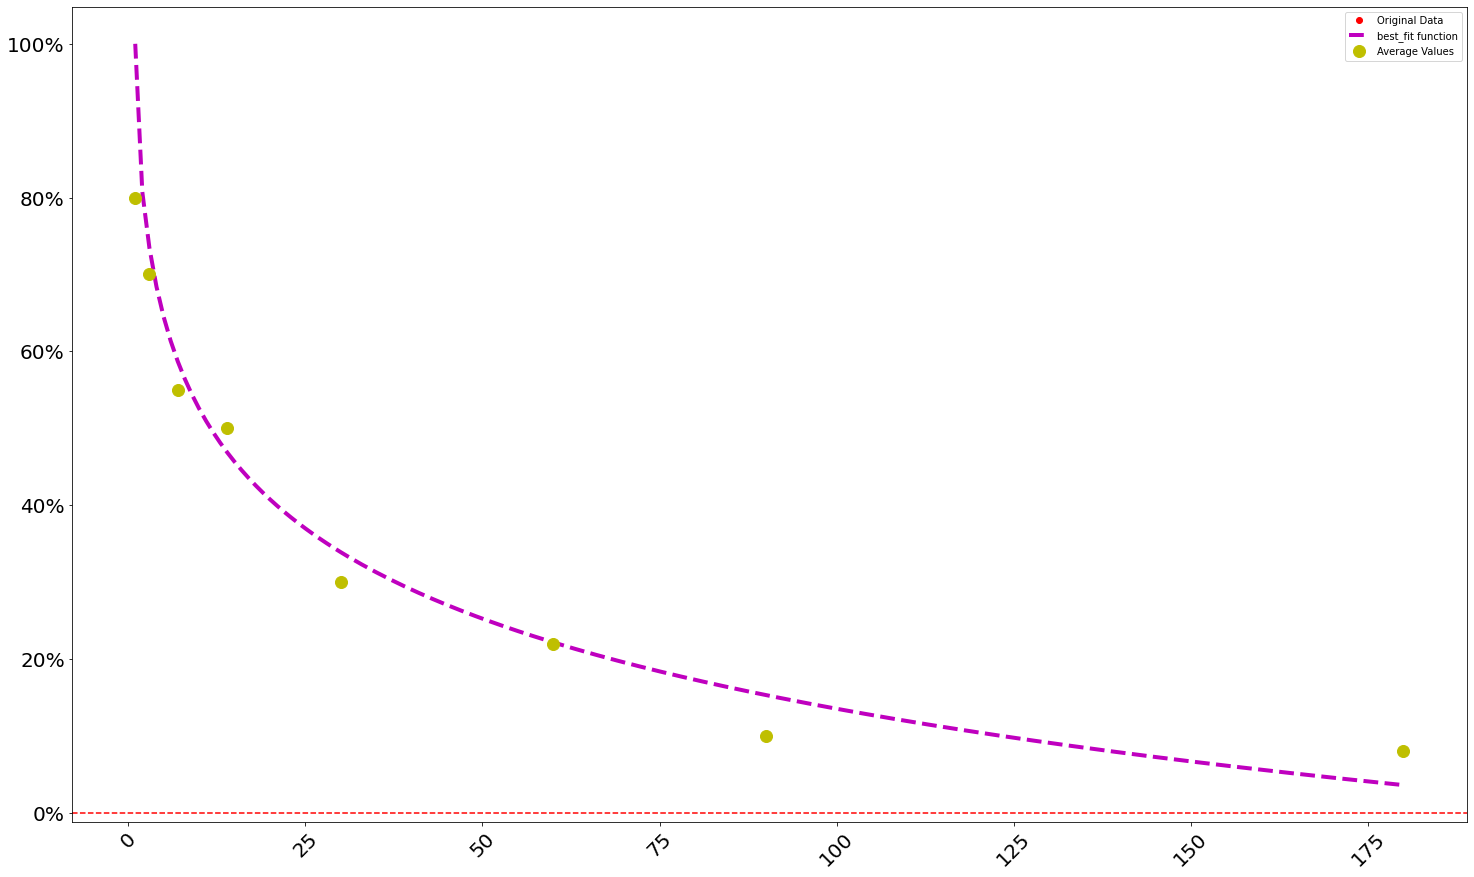

In [2]:
uba.plot_retention(facebook)

In [3]:
cohorts = [1000, 1000, 1000, 1000, 1000]

facebook_dau = uba.project_cohorted_DAU(
    profile=facebook, periods=50, cohorts=cohorts, start_date=1
)

facebook_dau

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
cohort_date,,,,,,,,,,,,,,,,,,,,,
1,1000,807,734,684,645,613,587,564,543,525,...,285,281,277,273,270,266,262,259,255,252
2,0,1000,807,734,684,645,613,587,564,543,...,290,285,281,277,273,270,266,262,259,255
3,0,0,1000,807,734,684,645,613,587,564,...,294,290,285,281,277,273,270,266,262,259
4,0,0,0,1000,807,734,684,645,613,587,...,298,294,290,285,281,277,273,270,266,262
5,0,0,0,0,1000,807,734,684,645,613,...,303,298,294,290,285,281,277,273,270,266


In [4]:
facebook_total = uba.DAU_total( facebook_dau )
facebook_total

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Value,,,,,,,,,,,,,,,,,,,,,
DAU,1000,1807,2541,3225,3870,3483,3263,3093,2952,2832,...,1470,1448,1427,1406,1386,1367,1348,1330,1312,1294


In [5]:
facebook_DAU = uba.project_cohorted_DAU(
    profile=facebook,
    periods=50,
    cohorts=cohorts,
    DAU_target=10000,
    DAU_target_timeline=10,
    start_date=1,
)

facebook_DAU

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
cohort_date,,,,,,,,,,,,,,,,,,,,,
1,1000,807,734,684,645,613,587,564,543,525,...,285,281,277,273,270,266,262,259,255,252
2,0,1000,807,734,684,645,613,587,564,543,...,290,285,281,277,273,270,266,262,259,255
3,0,0,1000,807,734,684,645,613,587,564,...,294,290,285,281,277,273,270,266,262,259
4,0,0,0,1000,807,734,684,645,613,587,...,298,294,290,285,281,277,273,270,266,262
5,0,0,0,0,1000,807,734,684,645,613,...,303,298,294,290,285,281,277,273,270,266
6,0,0,0,0,0,1613,1302,1184,1103,1040,...,496,489,481,474,467,461,454,448,441,435
7,0,0,0,0,0,0,1757,1418,1290,1201,...,549,541,532,524,517,509,502,495,488,481
8,0,0,0,0,0,0,0,1853,1495,1361,...,588,579,570,562,553,545,537,529,522,514
9,0,0,0,0,0,0,0,0,1934,1561,...,624,614,604,595,586,577,569,561,553,545


In [6]:
#get DNU from a DAU projection
facebook_DNU = uba.get_DNU(facebook_DAU)
facebook_DNU

,cohort_date,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
Value,,,,,,,,,,,,,,,,,,,,,
DNU,1000,1000.0,1000.0,1000.0,1000.0,1613.0,1757.0,1853.0,1934.0,2005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


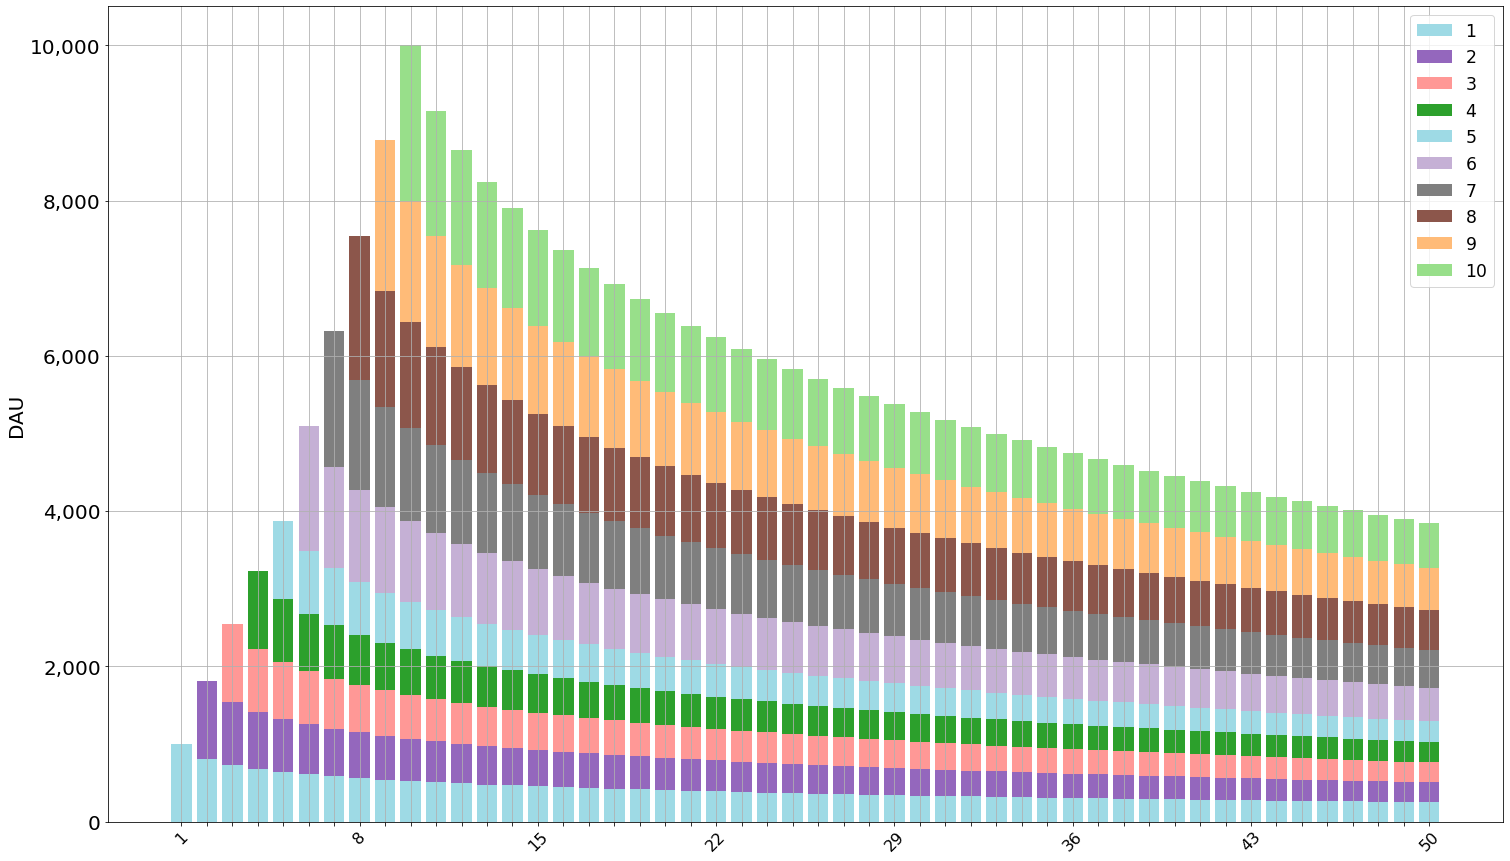

In [7]:
uba.plot_forward_DAU_stacked(
    forward_DAU=facebook_DAU,
    forward_DAU_labels=list(facebook_DAU.index),
    forward_DAU_dates=list(facebook_DAU.columns),
)

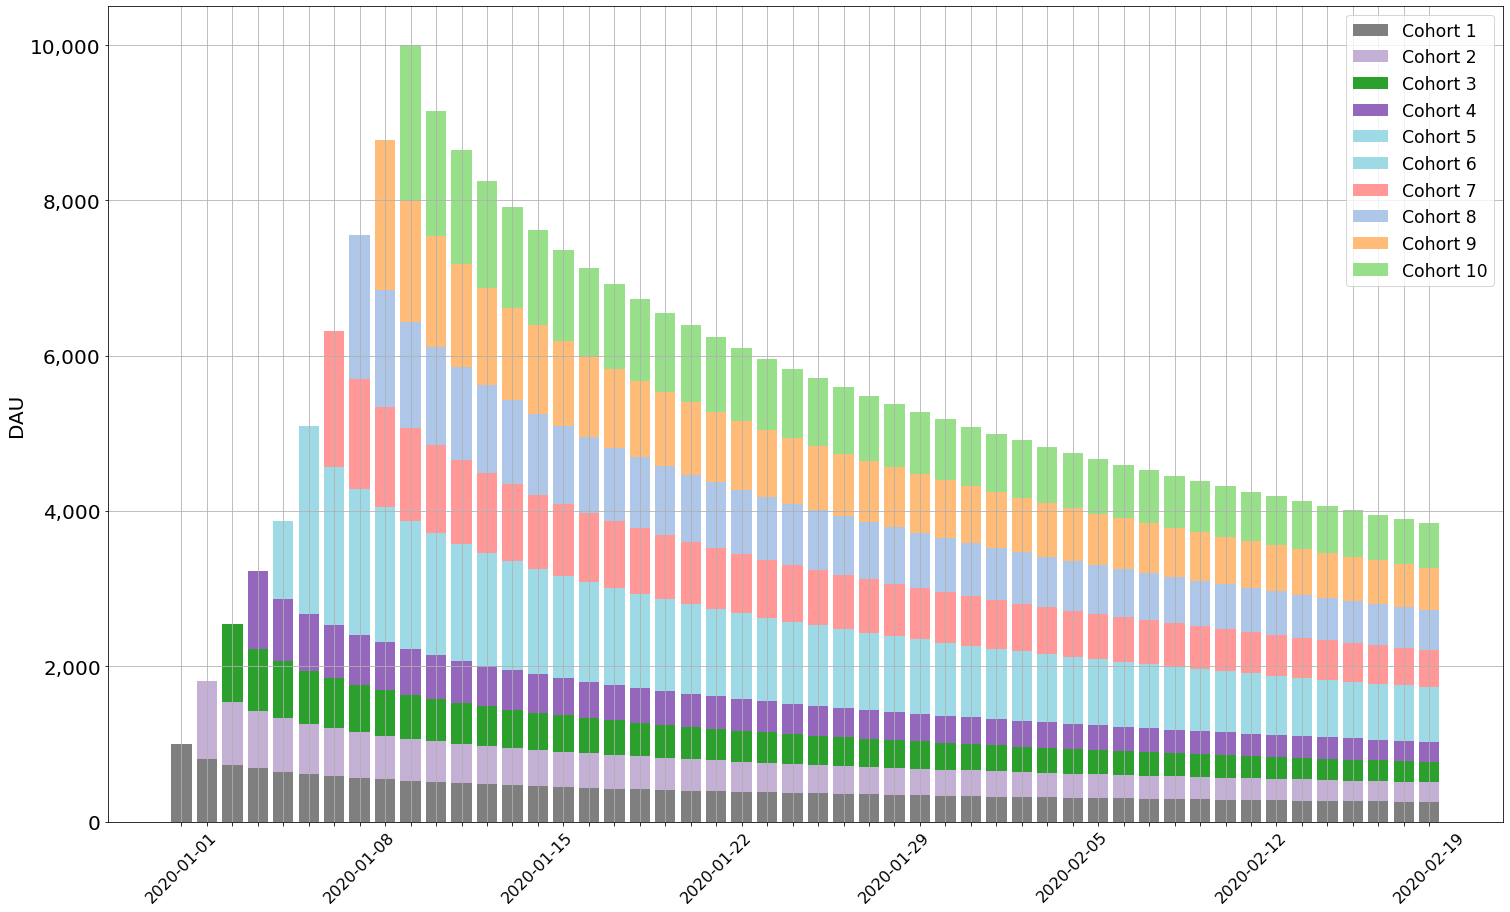

In [9]:
from datetime import date, timedelta

uba.plot_forward_DAU_stacked(
    forward_DAU=facebook_DAU,
    forward_DAU_labels=["Cohort " + str(x) for x in list(facebook_DAU.index)],
    forward_DAU_dates=[
        date(2020, 1, 1) + timedelta(days=int(x) - 1)
        for x in list(facebook_DAU.columns)
    ],
)